## Load & Extract

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### Read in data

In [2]:
df = pd.read_csv('yahoo.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-12-27,20.299999,20.299999,20.299999,20.299999,20.299999,2940000
1,1950-12-28,20.379999,20.379999,20.379999,20.379999,20.379999,3560000
2,1950-12-29,20.430000,20.430000,20.430000,20.430000,20.430000,3440000
3,1951-01-02,20.770000,20.770000,20.770000,20.770000,20.770000,3030000
4,1951-01-03,20.690001,20.690001,20.690001,20.690001,20.690001,3370000


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
17611,2020-12-18,3722.389893,3726.699951,3685.840088,3709.409912,3709.409912,7068340000
17612,2020-12-21,3684.280029,3702.899902,3636.479980,3694.919922,3694.919922,4732160000
17613,2020-12-22,3698.080078,3698.260010,3676.159912,3687.260010,3687.260010,4023940000
17614,2020-12-23,3693.419922,3711.239990,3689.280029,3690.010010,3690.010010,3772630000
17615,2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000


In [5]:
df.shape

(17616, 7)

#### Train Test Split

In [6]:
test_size=int(df.shape[0]*0.3)

In [7]:
df_train = df.iloc[:, 1:2].values[:-test_size]

In [8]:
df_train.shape

(12332, 1)

In [9]:
df_test = df.iloc[:, 1:2].values[-test_size:]

In [10]:
df_test.shape

(5284, 1)

## EDA

#### Plot

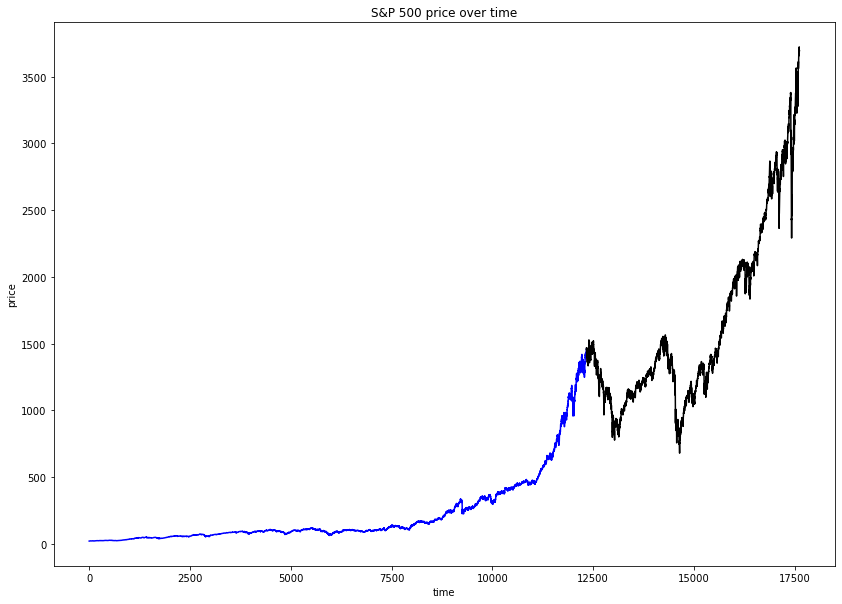

In [11]:
plt.figure(figsize=(14,10))
plt.plot(list(range(0, len(df_train))), df_train, c="blue", label="train")
plt.plot(list(range(len(df_train), len(df_train)+len(df_test))),df_test, c="black", label="test")
plt.title("S&P 500 price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

## Data Preprocessing

#### Scaling

In [12]:
sc = MinMaxScaler()
df_train_scaled = sc.fit_transform(df_train)
df_test_scaled = sc.transform(df_test)

In [13]:
df_train_scaled.shape

(12332, 1)

In [14]:
df_test_scaled.shape

(5284, 1)

#### Feature/Target

In [173]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix + 5 > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix + 5]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [174]:
X_train, y_train = split_sequence(df_train_scaled, 60)

In [175]:
X_train.shape

(12267, 60, 1)

In [176]:
y_train.shape

(12267, 1)

In [177]:
X_test, y_test = split_sequence(df_test_scaled,60)

In [178]:
X_test.shape

(5219, 60, 1)

In [179]:
y_test.shape

(5219, 1)

## Single Layer LSTM 

In [180]:
model = Sequential()

model.add(LSTM(50, input_shape = (X_train.shape[1], 1)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 1)

Epoch 1/100
307/307 [==============================] - 14s 39ms/step - loss: 7.3423e-04 - val_loss: 5.3599e-04
Epoch 2/100
307/307 [==============================] - 8s 27ms/step - loss: 1.0586e-05 - val_loss: 7.0178e-04
Epoch 3/100
307/307 [==============================] - 8s 26ms/step - loss: 1.0347e-05 - val_loss: 6.5494e-04
Epoch 4/100
307/307 [==============================] - 10s 31ms/step - loss: 8.7915e-06 - val_loss: 5.0704e-04
Epoch 5/100
307/307 [==============================] - 7s 23ms/step - loss: 9.4573e-06 - val_loss: 3.9270e-04
Epoch 6/100
307/307 [==============================] - 7s 22ms/step - loss: 8.9309e-06 - val_loss: 4.0987e-04
Epoch 7/100
307/307 [==============================] - 7s 23ms/step - loss: 9.0237e-06 - val_loss: 4.5047e-04
Epoch 8/100
307/307 [==============================] - 8s 26ms/step - loss: 9.4014e-06 - val_loss: 2.4677e-04
Epoch 9/100
307/307 [==============================] - 9s 29ms/step - loss: 8.0307e-06 - val_loss: 4.9773e-04
Epoch 10

Epoch 75/100
307/307 [==============================] - 7s 24ms/step - loss: 6.6542e-06 - val_loss: 2.4445e-04
Epoch 76/100
307/307 [==============================] - 7s 23ms/step - loss: 5.7186e-06 - val_loss: 2.5445e-04
Epoch 77/100
307/307 [==============================] - 7s 23ms/step - loss: 6.4433e-06 - val_loss: 2.7786e-04
Epoch 78/100
307/307 [==============================] - 7s 23ms/step - loss: 5.3216e-06 - val_loss: 3.2506e-04
Epoch 79/100
307/307 [==============================] - 8s 27ms/step - loss: 6.7312e-06 - val_loss: 2.2314e-04
Epoch 80/100
307/307 [==============================] - 7s 23ms/step - loss: 5.5974e-06 - val_loss: 2.9443e-04
Epoch 81/100
307/307 [==============================] - 8s 25ms/step - loss: 5.6172e-06 - val_loss: 3.4061e-04
Epoch 82/100
307/307 [==============================] - 8s 25ms/step - loss: 6.5341e-06 - val_loss: 2.6154e-04
Epoch 83/100
307/307 [==============================] - 8s 25ms/step - loss: 7.1610e-06 - val_loss: 2.3711e-04
E

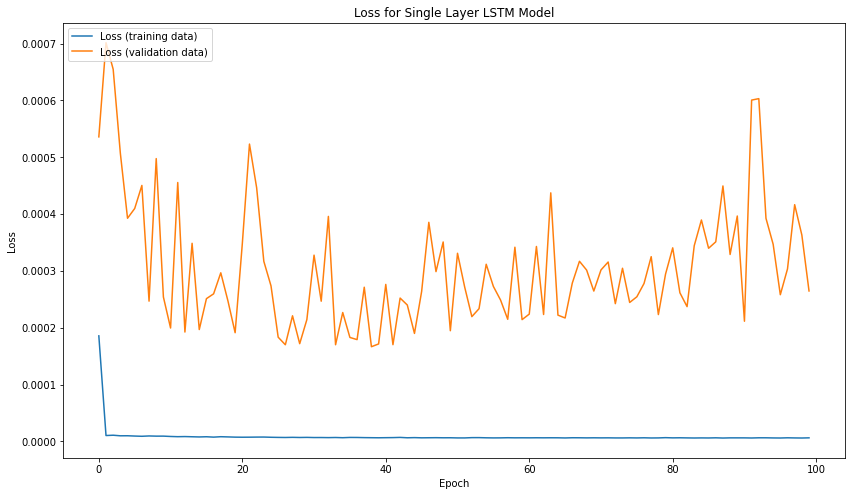

In [181]:
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Single Layer LSTM Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=2)
plt.show()

In [182]:
y_pred = model.predict(X_test, verbose=1)

164/164 [==============================] - 2s 9ms/step


In [183]:
y_pred = sc.inverse_transform(y_pred)

In [184]:
y_true = sc.inverse_transform(y_test)

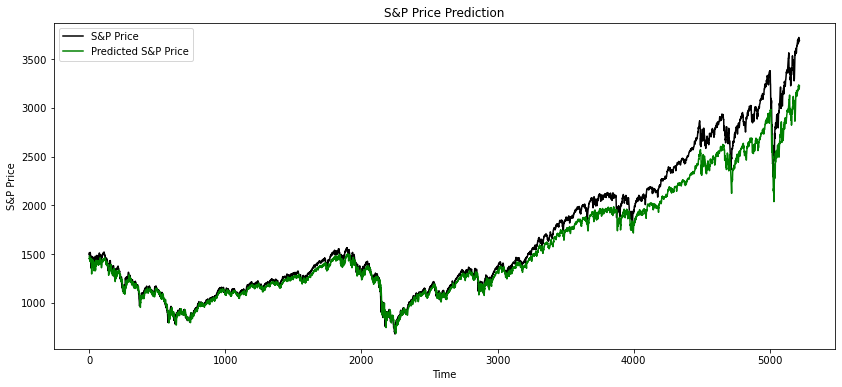

In [185]:
plt.figure(figsize=(14,6))
plt.plot(y_true, color = 'black', label = 'S&P Price')
plt.plot(y_pred, color = 'green', label = 'Predicted S&P Price')
plt.title('S&P Price Prediction')
plt.xlabel('Time')
plt.ylabel('S&P Price')
plt.legend()
plt.show()

In [186]:
r2_score(y_true,y_pred)

0.9472918329704356

## Dashboard

In [30]:
import plotly.express as px 
import plotly.graph_objects as go

In [207]:
df_pred = pd.DataFrame(y_pred,columns=['pred'])
df_pred['true']=y_true
df_pred['time']=df_pred.index

df_pred

,pred,true,time
0,1450.941772,1508.520020,0
1,1448.612915,1487.920044,1
2,1478.510498,1498.579956,2
3,1471.005127,1505.979980,3
4,1466.591919,1494.729980,4
...,...,...,...
5214,3190.745361,3722.389893,5214
5215,3192.249268,3684.280029,5215
5216,3208.584473,3698.080078,5216
5217,3197.755859,3693.419922,5217


In [208]:
df_pred.to_csv('pred5.csv')

## Prediction (5 days)

In [209]:
dff = pd.read_csv('010821.csv')
dff.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000
247,2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000
248,2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000
249,2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000
250,2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4764180000


In [210]:
dff = dff.iloc[:, 1:2].values

In [211]:
dff = sc.transform(dff)

In [212]:
dff = dff[-60:].reshape(1,60,1)

In [213]:
pred_scaled = model.predict(dff,verbose=1)

1/1 [==============================] - 0s 31ms/step


In [214]:
pred = sc.inverse_transform(pred_scaled)

In [216]:
print('Friday January 15th, 2020: ', pred)

Friday January 15th, 2020:  [[3322.9976]]
